# Gradient Descent vs Stochastic Gradient Descent
Visual comparison of smooth deterministic descent (BGD) and noisy stochastic descent (SGD) on a convex function.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function & gradient
def f(w):
    w1, w2 = w
    return w1**2 + 2*w2**2

def grad(w):
    w1, w2 = w
    return np.array([2*w1, 4*w2])


Text(0.5, 1.0, 'Gradient Descent vs Stochastic Gradient Descent')

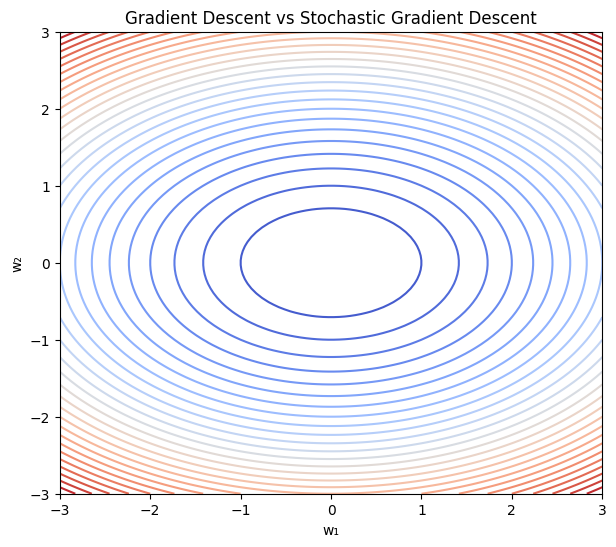

In [2]:
w1 = np.linspace(-3, 3, 100)
w2 = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = f([W1, W2])

fig, ax = plt.subplots(figsize=(7,6))
ax.contour(W1, W2, Z, levels=30, cmap='coolwarm')
ax.set_xlabel("w₁")
ax.set_ylabel("w₂")
ax.set_title("Gradient Descent vs Stochastic Gradient Descent")


In [3]:
np.random.seed(42)
w_bgd = np.array([2.5, 2.0])   # initial point
w_sgd = np.array([2.5, 2.0])

eta = 0.15     # learning rate
steps = 25

bgd_points = [w_bgd.copy()]
sgd_points = [w_sgd.copy()]

for i in range(steps):
    # BGD (full gradient)
    w_bgd -= eta * grad(w_bgd)
    bgd_points.append(w_bgd.copy())

    # SGD (noisy gradient)
    noise = np.random.randn(2) * 0.4
    w_sgd -= eta * (grad(w_sgd) + noise)
    sgd_points.append(w_sgd.copy())

bgd_points = np.array(bgd_points)
sgd_points = np.array(sgd_points)


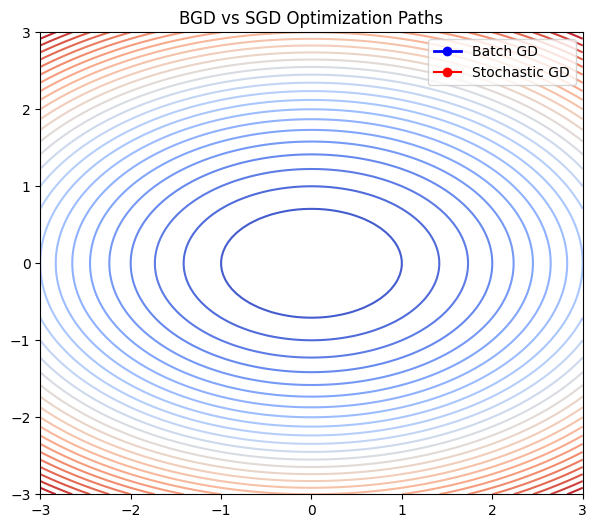

In [4]:
fig, ax = plt.subplots(figsize=(7,6))
ax.contour(W1, W2, Z, levels=30, cmap='coolwarm')
line_bgd, = ax.plot([], [], 'bo-', lw=2, label='Batch GD')
line_sgd, = ax.plot([], [], 'ro-', lw=1.5, label='Stochastic GD')
point_bgd, = ax.plot([], [], 'bo')
point_sgd, = ax.plot([], [], 'ro')

ax.legend()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title("BGD vs SGD Optimization Paths")

def init():
    line_bgd.set_data([], [])
    line_sgd.set_data([], [])
    point_bgd.set_data([], [])
    point_sgd.set_data([], [])
    return line_bgd, line_sgd, point_bgd, point_sgd

def update(i):
    line_bgd.set_data(bgd_points[:i,0], bgd_points[:i,1])
    line_sgd.set_data(sgd_points[:i,0], sgd_points[:i,1])
    point_bgd.set_data(bgd_points[i,0], bgd_points[i,1])
    point_sgd.set_data(sgd_points[i,0], sgd_points[i,1])
    return line_bgd, line_sgd, point_bgd, point_sgd

ani = animation.FuncAnimation(fig, update, frames=len(bgd_points),
                              init_func=init, blit=True, interval=400)

plt.show()



### Key Insights
- **Batch GD**: moves smoothly toward the minimum — precise but slower per update.
- **SGD**: jumps erratically due to noise — faster iterations, but less stable.
- Over time, both converge near the true minimum (0, 0).

This distinction is crucial in deep learning — SGD enables training on large datasets by approximating the true gradient with random subsets.
